In [65]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve

plt.rcParams['text.usetex'] = True

# Density Plots

In [66]:
# Define the functions

k = 5/2

def g(r):
    return np.log(((1 - 2*c + c**2 + 4*k*r + 2*c*k*r + 3*k**2*r**2) / (3*k*r + 3*k**2*r**2))**((-4 + c)/(-1 + c)))


def rho(r):
    return (1 / (32 * (-1 + c)**2 * np.pi * (1 + c**2 + 4 * k * r + 3 * k**2 * r**2 + 2 * c * (-1 + k * r))**6)) * \
            81 * (-4 + c) * c * k**4 * r**2 * (1 + k * r)**2 * \
            (((1 - 2 * c + c**2 + 4 * k * r + 2 * c * k * r + 3 * k**2 * r**2) / (3 * k * r + 3 * k**2 * r**2))**((3 * c) / (-1 + c))) * \
            (3 + 12 * k * r - 14 * k**2 * r**2 - 116 * k**3 * r**3 - 93 * k**4 * r**4 + 
             c**4 * (3 + 12 * k * r + 4 * k**2 * r**2) + 
             4 * c**3 * (-3 - 12 * k * r + 5 * k**2 * r**2 + 2 * k**3 * r**3) - 
             6 * c**2 * (-3 - 12 * k * r + 11 * k**2 * r**2 - 2 * k**3 * r**3 + 2 * k**4 * r**4) + 
             4 * c * (-3 - 12 * k * r + 14 * k**2 * r**2 + 24 * k**3 * r**3 + 33 * k**4 * r**4))

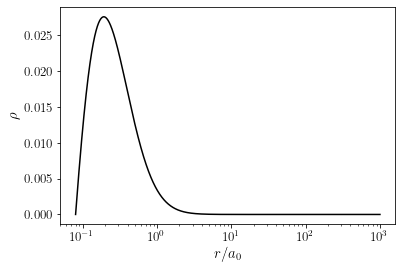

In [67]:
c = 0.4
sigma = (1-c)/(3*k)

kk = 10**-10
start = sigma
end = 10**3
r_vals = np.linspace(np.log(start/kk), np.log(end/kk), 10**4)
r_values = kk*np.exp(r_vals)


rho_values = [rho(r) for r in r_values]
rho_values = np.nan_to_num(rho_values)

# Plot the results
plt.plot(r_values, rho_values, 'k', label=r'$\rho$')
plt.xlabel('$r/{a_0}$', fontsize = 15)
plt.ylabel(r'$\rho$', fontsize = 15)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xscale('log')
plt.savefig('..//figures//caseiDens.pdf')
plt.show()

del c

# $g_{rr}$ plots

In [68]:
c = 0.4
sigma = (1-c)/(3*k)
#Range of vals

kk = 10**-10
start = sigma
end = 10**3
r_vals = np.linspace(np.log(start/kk), np.log(end/kk), 10**4)
r_values = kk*np.exp(r_vals)

def grr(r):
    return np.exp(g(r))

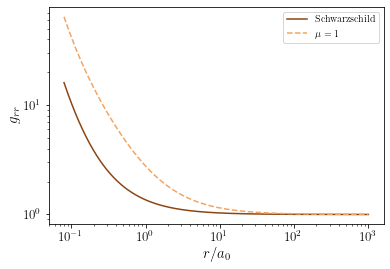

In [69]:
grr_1 = [grr(r) for r in r_values]

# Schwarzschild

grr_schw = [(1+(sigma/r))**4 for r in r_values]

# Plot the results
plt.plot(r_values, grr_schw, c = 'saddlebrown', linestyle ='-', label=r'$\mathrm{Schwarzschild}$')
plt.plot(r_values, grr_1, c = 'sandybrown', linestyle= '--', label=r'$\mu=1$')
plt.xlabel('$r/{a_0}$', fontsize = 15)
plt.ylabel(r'$g_{rr}$', fontsize = 15)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.savefig('..//figures//grrPlot.pdf')
plt.show()

del c

# $g_{tt}$ equation

In [70]:
def gtt(r):
    return 5**((3*(-4 + c)*c)/(2*(-2 + c + c**2))) * \
           27**(c/(2 - 2*c)) * \
           (1 - c)**((3*c)/(4 + 2*c)) * \
           np.exp(((-8 - 23*c + 4*c**2) * (np.pi + 2*np.arctan((-4 + 7*c - 10*r + 10*c*r)/np.sqrt(c*(32 - 49*c + 8*c**2)))))/
                  (2*(2 + c)*np.sqrt(-49 + 32/c + 8*c))) * \
           r**((3*(-4 + c)*c)/(2*(-2 + c + c**2))) * \
           (-2 + 2*c + 15*r)**2 * \
           ((2 + 5*r)/(4 - 8*c + 4*c**2 + 40*r + 20*c*r + 75*r**2))**((-4 + c)/(2*(-1 + c))) * \
           (-2*c**2 + (2 + 5*r)**2 - c*(2 + 35*r + 25*r**2))**(-((3*c)/(4 + 2*c)))

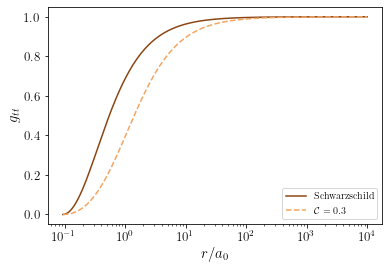

In [71]:
c = 0.3
sigma = (1-c)/(3*k)
#Range of vals

kk = 10**-10
start = sigma
end = 10**4
r_vals = np.linspace(np.log(start/kk), np.log(end/kk), 10**4)
r_eval = kk*np.exp(r_vals)

schwa = [((1-(sigma/r))/(1+(sigma/r)))**2 for r in r_eval]

# Plot the solution
plt.plot(r_eval, schwa, c = 'saddlebrown', linestyle ='-', label=r'$\mathrm{Schwarzschild}$')
plt.plot(r_eval, gtt(r_eval),  c = 'sandybrown', linestyle ='--', label='$\mathcal{C}=0.3$')
plt.xlabel('$r/{a_0}$', fontsize = 15)
plt.ylabel(r'$g_{tt}$', fontsize = 15)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xscale('log')
plt.legend(loc = 'lower right')
plt.savefig('..//figures//gtt.pdf')
plt.show()

del c

# Light Rings

Define relevant quantities.

In [72]:
def f_prime(r):
    return ((-4 + c) * (4 * c**2 * (1 + 5 * r) + (2 + 5 * r)**2 + c * (-8 - 40 * r + 50 * r**2)) *
            (-30 * r * (2 + 5 * r)**2 + 4 * c**3 * (3 + 5 * r) + 2 * c**2 * (-12 + 40 * r + 75 * r**2) +
             c * (12 + 20 * r + 675 * r**2 + 750 * r**3))) / \
           ((-1 + c) * r * (2 + 5 * r) * (4 + 4 * c**2 + 40 * r + 75 * r**2 + 4 * c * (-2 + 5 * r)) *
            (4 * c**3 + 50 * c**2 * r * (2 + r) - (2 + 5 * r)**2 * (-2 + 15 * r) +
             c * (-12 - 80 * r + 425 * r**2 + 375 * r**3)))


def g_prime(r):
    return -((2 * (-4 + c) * (4 * c**2 * (1 + 5 * r) + (2 + 5 * r)**2 + c * (-8 - 40 * r + 50 * r**2))) /
             ((-1 + c) * r * (2 + 5 * r) * (4 + 4 * c**2 + 40 * r + 75 * r**2 + 4 * c * (-2 + 5 * r))))

def lr_eqn(r):
    return -2+r*f_prime(r)-r*g_prime(r)

def circ_lr(r):
    return 2*np.pi*r*np.sqrt(grr(r))

def circum(r):
    return 2*np.pi*np.sqrt(grr(r))

def ehr(c):
    return 2*(1-c)/15

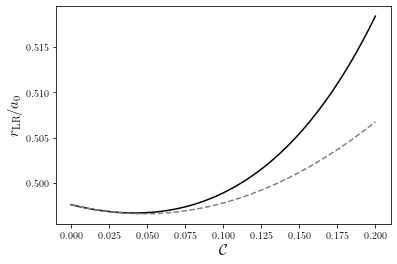

In [73]:
c_vals = np.linspace(10**-20, 0.2, 10**3)

lr_vals_1 = []

for c_val in c_vals:
    c = c_val
    lr_vals_1.append(*fsolve(lr_eqn, 0.5))

def lr_app(c):
    return 2/15 * (2 + np.sqrt(3)) + ((-47 - 61 * np.sqrt(3)) * c)/3630 + (3 * (93033 + 82303 * np.sqrt(3)) * c**2)/1610510 
plt.plot(c_vals, lr_vals_1, c = 'black')
plt.plot(c_vals, lr_app(c_vals), c = 'gray', linestyle = '--')
plt.xlabel('$\mathcal{C}$', fontsize = 15)
plt.ylabel('$r_{\mathrm{LR}}/a_0$', fontsize = 15)
plt.savefig('..//figures//LightRingPlot.pdf')
plt.show()

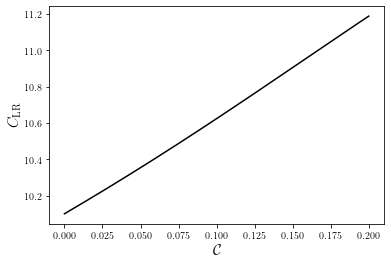

In [74]:
c_vals = np.linspace(10**-20, 0.2, 10**3)

lr_vals_1 = []
circ_vals = []
for c_val in c_vals:
    c = c_val
    lr_vals_1.append(*fsolve(lr_eqn, 0.5))
    circ_vals.append(circum(*fsolve(lr_eqn, 0.5)))

plt.plot(c_vals, circ_vals, c = 'black')
plt.xlabel('$\mathcal{C}$', fontsize = 15)
plt.ylabel('$C_{\mathrm{LR}}$', fontsize = 15)
plt.show()

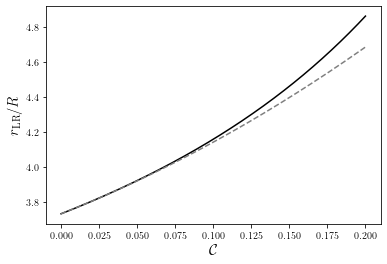

In [75]:
ratio = lr_vals_1/ehr(c_vals)
def lr_app2(c):
    return 2 + np.sqrt(3) + 3/484 * (307 + 141 * np.sqrt(3)) * c + (3 * (171929 + 108645 * np.sqrt(3)) * c**2)/161051 


plt.plot(c_vals, ratio, c = 'black')
plt.plot(c_vals, lr_app2(c_vals), c = 'gray', linestyle = '--')
plt.xlabel('$\mathcal{C}$', fontsize = 15)
plt.ylabel('$r_{\mathrm{LR}}/R$', fontsize = 15)
plt.savefig('..//figures//lrratio.pdf')
plt.show()

In [76]:
rho_max_vals = []
for c_val in c_vals:
    c = c_val
    sigma = (1-c)/(3*k)

    start = sigma
    end = 1
    r_values = np.linspace(sigma, end, 10**4)
    rho_values = [rho(r) for r in r_values]
    rho_values = np.nan_to_num(rho_values)
    rho_max_vals.append(np.min(r_values[rho_values == np.max(rho_values)]))

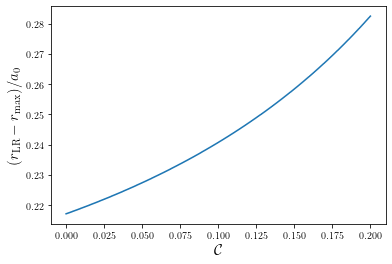

In [77]:
plt.plot(c_vals, lr_vals_1 - np.array(rho_max_vals))
plt.xlabel('$\mathcal{C}$', fontsize = 15)
plt.ylabel('$({{r_{\mathrm{LR}}}}-r_{\mathrm{max}})/a_0$', fontsize = 15)
plt.show()

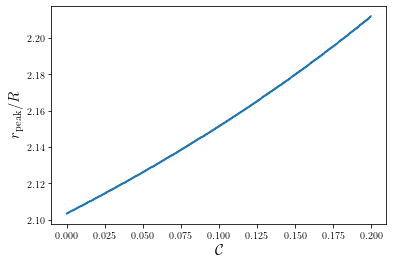

In [78]:
plt.plot(c_vals, np.array(rho_max_vals)/ehr(c_vals))
plt.xlabel('$\mathcal{C}$', fontsize = 15)
plt.ylabel('$r_{\mathrm{peak}}/R$', fontsize = 15)
plt.show()

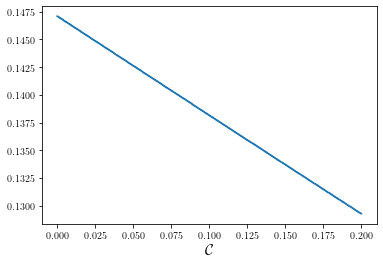

In [79]:
plt.plot(c_vals, np.array(rho_max_vals) - ehr(c_vals))
plt.xlabel('$\mathcal{C}$', fontsize = 15)
plt.show()

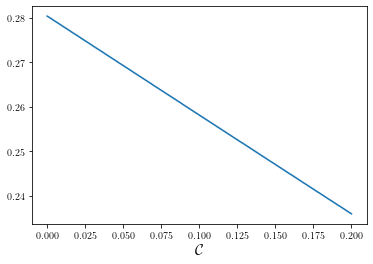

In [80]:
plt.plot(c_vals, np.array(rho_max_vals))
plt.xlabel('$\mathcal{C}$', fontsize = 15)
plt.show()

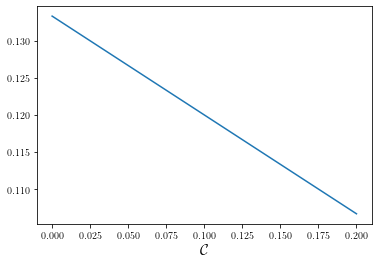

In [81]:
plt.plot(c_vals, ehr(c_vals))
plt.xlabel('$\mathcal{C}$', fontsize = 15)
plt.show()

In [82]:
c_vals[lr_vals_1 == min(lr_vals_1)]

array([0.04184184])

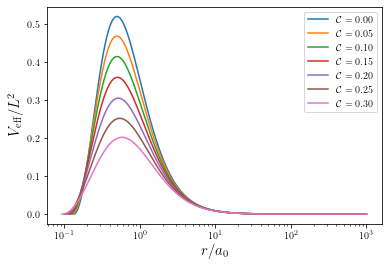

In [83]:
def v_eff(r):
    return gtt(r)/(np.exp(g(r))*r**2)

new_c_vals = [10**-30, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3]

for c_val in new_c_vals:
    c = c_val
    kk = 10**-20
    start = (1-c)/(3*(5/2))
    end = 10**3
    r_vals = np.linspace(np.log(start/kk), np.log(end/kk), 10**3)
    r_eval = kk*np.exp(r_vals)

    if c_val == 10**-20:
        plt.plot(r_eval, v_eff(r_eval), label = '$\mathcal C = 0.0$')
    else:
        plt.plot(r_eval, v_eff(r_eval), label = '$\mathcal C = {:.2f}$'.format(c))
plt.xscale('log')
plt.xlabel('$r/a_0$', fontsize = 15)
plt.ylabel('$V_\mathrm{{eff}}/L^2$', fontsize = 15)
plt.legend()
plt.savefig('..//figures//veff.pdf')
plt.show()

# Angular frequency at $r_{\mathrm{LR}}$

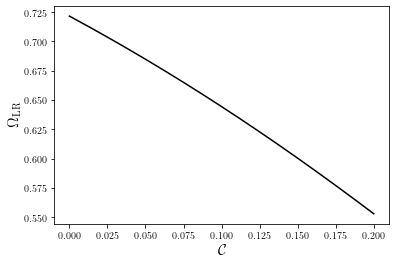

In [84]:
om_1 = []

for i in range(len(lr_vals_1)):
    c = c_vals[i]
    om_1.append(np.sqrt(gtt(lr_vals_1[i])/(np.exp(g(lr_vals_1[i]))*lr_vals_1[i]**2)))

plt.plot(c_vals, om_1, c = 'black')
plt.xlabel('$\mathcal{C}$', fontsize = 15)
plt.ylabel('$\Omega_{\mathrm{LR}}$', fontsize = 15)
plt.savefig('..//figures//AngFreqPlot.pdf')
plt.show()

In [85]:
om_1[0]

0.7216878364870323

# Impact Parameter

In [86]:
imp_1 = []

for i in range(len(lr_vals_1)):
    imp_1.append(1/om_1[i])


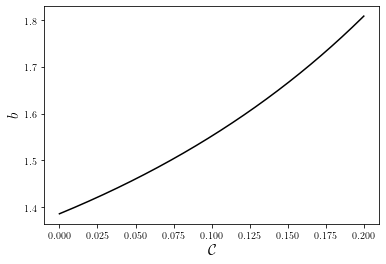

In [87]:
plt.plot(c_vals, imp_1, c = 'black')
plt.xlabel('$\mathcal{C}$', fontsize = 15)
plt.ylabel('$b$', fontsize = 15)
plt.savefig('..//figures//ImpactParameter.pdf')
plt.show()